#Giorgio Mendoza
#CS539-F23-F02
#Dr. J. Sethi
#Milestone 2: Week 6: EDA


#Problem Statement and Background

**Research Question:** Is there a statistically significant correlation between the production of plastic waste and key socio-economic factors, i.e. Gross Domestic Product (GDP) and population density, across various countries and regions?


**Main Hypothesis:** There is a statistically significant correlation between the production of plastic waste and key socio-economic factors, including Gross Domestic Product (GDP) and population density, across various countries and regions.

I selected this topic because plastic pollution is still a current issue that started several years ago and it's still ongoing.  According to a few papers, microplastics have been found in the human lungs [1], fetal placental tissues [2], human breast milk [3] and even human blood [4],  Since this is a global issue, it would be interesting to identify how much every country contributes to global plastic production.




#Datasets

I believe I have plenty of datasets that I can use in my final analysis. However, for this milestone, I will use 4 specific datasets which represents past data, current data and projection data regarding plastic production and recycling. Some of the datasets are classified by regions, years ranges, plastic application and disposal methods.
The datasets were also obtained from credible sources such the OECD iLibrary and OurWorldinData.com. I'm also including the projection dataset because it would be interesting to compare it with the results I will find in my final research.     

#Data Joining/Cleaning

Fortunately, all the datasets that I used were already cleaned and the data was properly classified. I did have an issue with the first dataset below. The dataset below has an Entity column which describes the countries and regions, however, I was only able to create a plot for the "world" only. I didn't get an error when plotting, so I examined the dataset it could be because the units are too large or because the name of the variables are too long as well.

Since I didn't have much time I decided to only use the World entity for this dataset.

Fortunately, I found a similar dataset that also has data about plastic production by regions.


#Basic Data Characteristics

**Key Characteristics:**

Numerical Data: The datasets primarily contain numerical values, facilitating various statistical analyses and visualizations.

**Country/Region Identification:**

Each entry in the datasets is associated with a specific country or region, enabling geospatial analysis and comparisons.

**Temporal Scope:**

The data covers a substantial historical period, allowing for the examination of long-term trends and patterns.

**Data Plots and Visualizations:**

Below, you will find Python code and accompanying plots that illustrate important aspects of the datasets. These visualizations include time series plots and scatter plots, providing insights into the data's distribution, trends, and potential relationships between variables. The scatter plots are located in the Visualization section.

**Data Cleaning and Preprocessing:**

As mentiond earlier, most of the data was already cleaned and most datasets included similar columns which made the preprocessing step simple. However, it's important to ensure that the data used doesn't include inconsistencies or errors because they can affect the results.

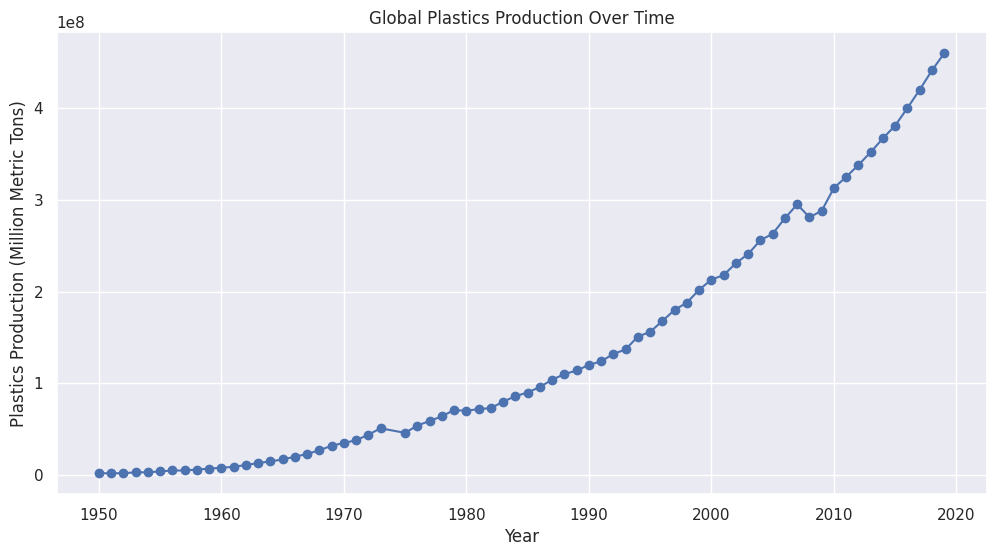

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/global-plastics-production.csv')

# Drop rows with missing 'Annual plastic production between 1950 and 2019' values
df = df.dropna(subset=['Annual plastic production between 1950 and 2019'])

# Extract the features (year) and target (plastics production)
year = df['Year'].values
plastics_production = df['Annual plastic production between 1950 and 2019']

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(year, plastics_production, marker='o', linestyle='-')
plt.title('Global Plastics Production Over Time')
plt.xlabel('Year')
plt.ylabel('Plastics Production (Million Metric Tons)')
plt.grid(True)

# Show the chart
plt.show()


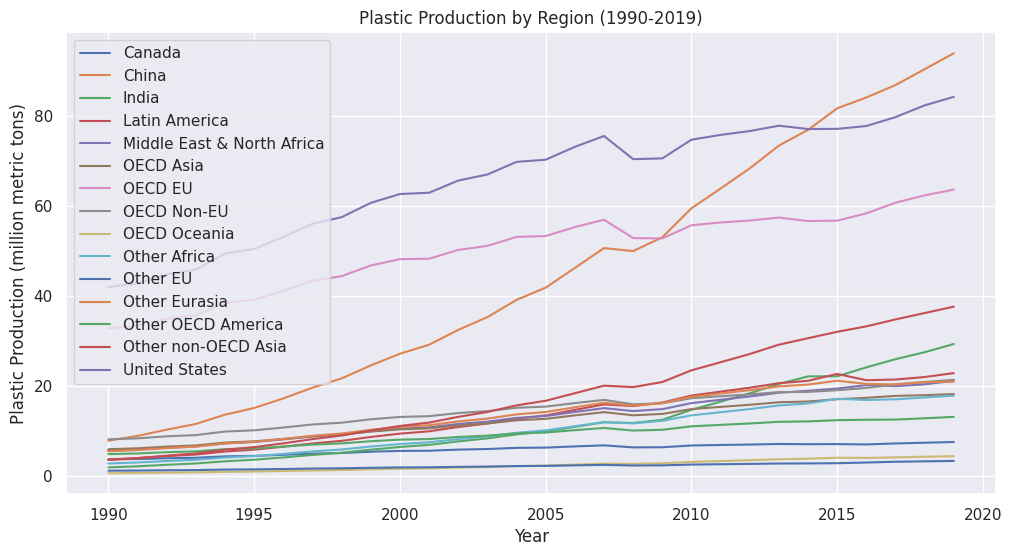

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pbr.csv')

# Filter data for the desired years (1990-2019)
df_filtered = df[(df['TIME'] >= 1990) & (df['TIME'] <= 2019)]

# Group data by Location and aggregate the plastic production values
region_data = df_filtered.groupby('Location')['Value'].sum()

# Create a line plot for plastic production by region
plt.figure(figsize=(12, 6))
for region, values in region_data.items():
    plt.plot(df_filtered[df_filtered['Location'] == region]['TIME'], df_filtered[df_filtered['Location'] == region]['Value'], label=region)

plt.xlabel('Year')
plt.ylabel('Plastic Production (million metric tons)')
plt.title('Plastic Production by Region (1990-2019)')
plt.legend()
plt.grid(True)
plt.show()


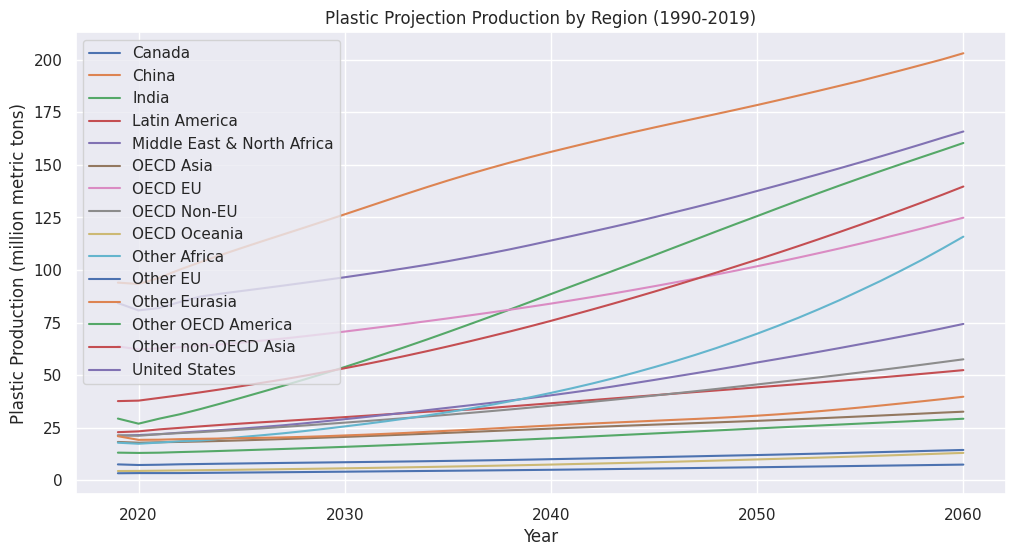

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prb-projection.csv')

# Filter data for the desired years (1990-2019)
df_filtered = df[(df['TIME'] >= 2019) & (df['TIME'] <= 2060)]

# Group data by Location and aggregate the plastic production values
region_data = df_filtered.groupby('Location')['Value'].sum()

# Create a line plot for plastic production by region
plt.figure(figsize=(12, 6))
for region, values in region_data.items():
    plt.plot(df_filtered[df_filtered['Location'] == region]['TIME'], df_filtered[df_filtered['Location'] == region]['Value'], label=region)

plt.xlabel('Year')
plt.ylabel('Plastic Production (million metric tons)')
plt.title('Plastic Projection Production by Region (1990-2019)')
plt.legend()
plt.grid(True)
plt.show()


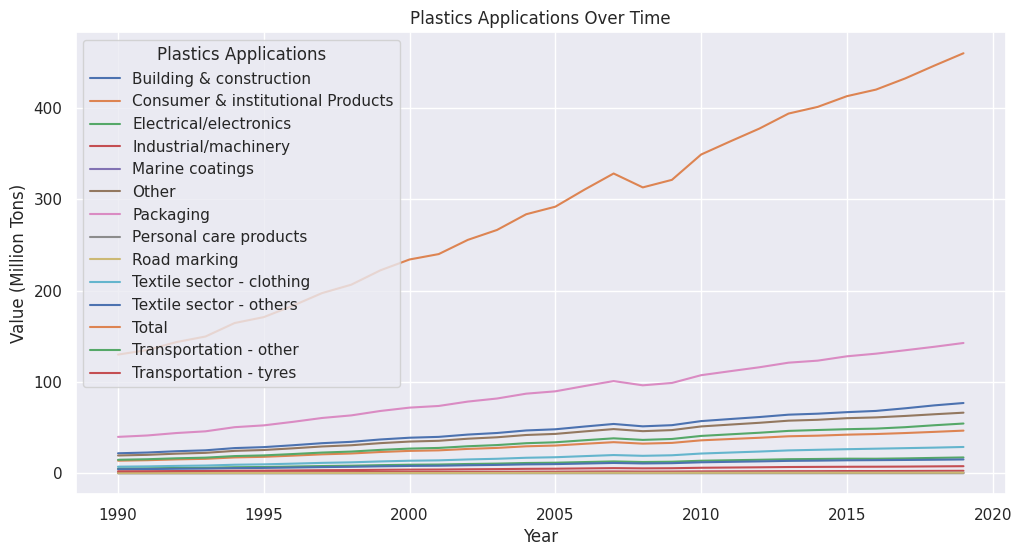

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pba.csv')

# Filter the dataset for the specific columns you want
selected_columns = ["Plastics applications", "Time", "Value"]

# Create a pivot table to reshape the data
pivot_df = df[selected_columns].pivot(index="Time", columns="Plastics applications", values="Value")

# Plot the data
pivot_df.plot(kind='line', figsize=(12, 6))
plt.title('Plastics Applications Over Time')
plt.xlabel('Year')
plt.ylabel('Value (Million Tons)')
plt.legend(title='Plastics Applications', loc='upper left')
plt.grid(True)

# Show the plot
plt.show()


In [74]:
import pandas as pd

# Load the datasets
df_applications = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pba.csv')
df_production = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pbr.csv')

# Check the column names in both datasets
print(df_applications.columns)
print(df_production.columns)

# Assuming both datasets have a common column for merging, use that column
common_column = 'TIME'

# Merge the datasets on the common column 'TIME'
merged_data = pd.merge(df_applications, df_production, on=common_column)

# Compute the correlation between plastic applications and production
correlation = merged_data['Value_x'].corr(merged_data['Value_y'])

print(f'Correlation between Plastic Applications and Production: {correlation}')


Index(['PLASTICS_APPLICATIONS', 'Plastics applications', 'TIME', 'Time',
       'Value', 'Flag Codes', 'Flags'],
      dtype='object')
Index(['LOCATION', 'Location', 'TIME', 'Time', 'Value', 'Flag Codes', 'Flags'], dtype='object')
Correlation between Plastic Applications and Production: 0.06141938876702348


#Visualizations




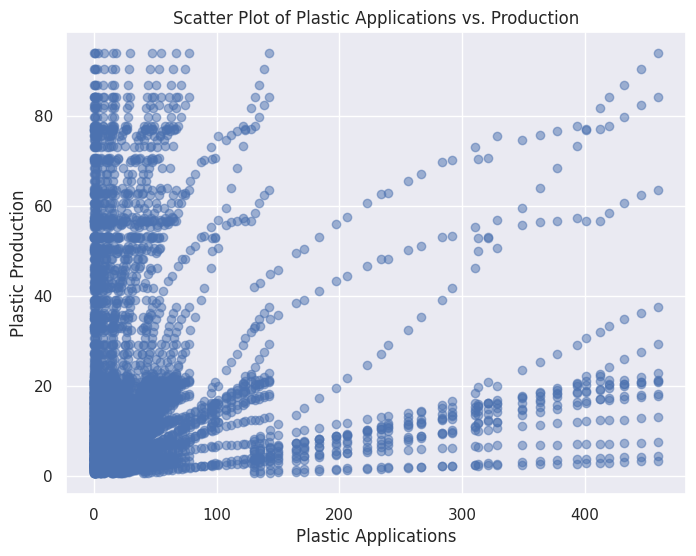

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_applications = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pba.csv')
df_production = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pbr.csv')

# Assuming both datasets have a common column for merging, use that column
common_column = 'TIME'

# Merge the datasets on the common column 'TIME'
merged_data = pd.merge(df_applications, df_production, on=common_column)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Value_x'], merged_data['Value_y'], alpha=0.5)
plt.title('Scatter Plot of Plastic Applications vs. Production')
plt.xlabel('Plastic Applications')
plt.ylabel('Plastic Production')
plt.grid(True)
plt.show()


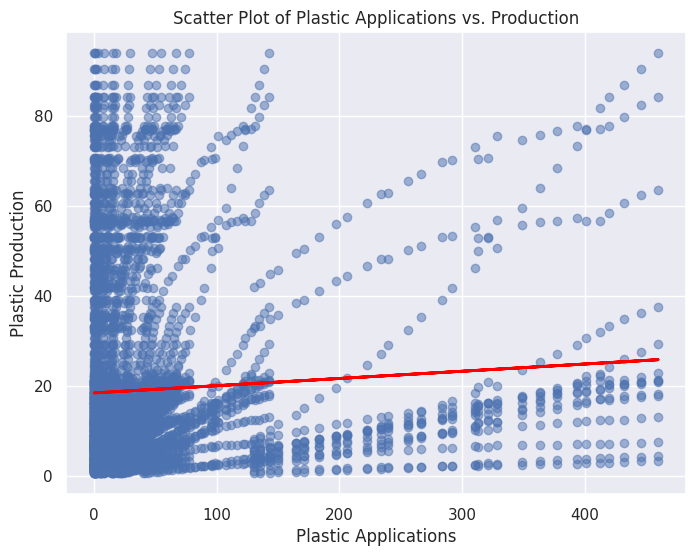

Slope (Coefficient): 0.016064907797973437
Intercept: 18.456069771004458


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the datasets
df_applications = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pba.csv')
df_production = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pbr.csv')

# Assuming both datasets have a common column for merging, use that column
common_column = 'TIME'

# Merge the datasets on the common column 'TIME'
merged_data = pd.merge(df_applications, df_production, on=common_column)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Value_x'], merged_data['Value_y'], alpha=0.5)
plt.title('Scatter Plot of Plastic Applications vs. Production')
plt.xlabel('Plastic Applications')
plt.ylabel('Plastic Production')
plt.grid(True)

# Extract the independent variable (Plastic Applications) and dependent variable (Plastic Production)
X = merged_data[['Value_x']]
y = merged_data['Value_y']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients of the model
slope = model.coef_[0]
intercept = model.intercept_

# Add the regression line to the plot
plt.plot(X, slope * X + intercept, color='red', linewidth=2)

# Show the plot
plt.show()

# Print the coefficients of the regression model
print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



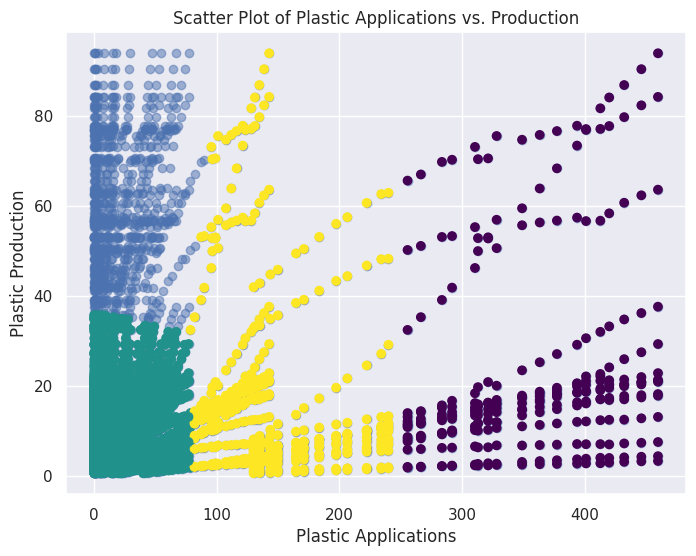

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the datasets
df_applications = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pba.csv')
df_production = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pbr.csv')

# Assuming both datasets have a common column for merging, use that column
common_column = 'TIME'

# Merge the datasets on the common column 'TIME'
merged_data = pd.merge(df_applications, df_production, on=common_column)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Value_x'], merged_data['Value_y'], alpha=0.5)
plt.title('Scatter Plot of Plastic Applications vs. Production')
plt.xlabel('Plastic Applications')
plt.ylabel('Plastic Production')
plt.grid(True)

# Use K-means clustering to identify regions of outlier concentrations
data = merged_data[['Value_x', 'Value_y']]
kmeans = KMeans(n_clusters=4)  # You can adjust the number of clusters
kmeans.fit(data)
merged_data['Cluster'] = kmeans.predict(data)

# Highlight the outlier concentrations by plotting them with different colors
outlier_clusters = merged_data[merged_data['Cluster'] != 0]  # Adjust cluster number as needed
plt.scatter(outlier_clusters['Value_x'], outlier_clusters['Value_y'], c=outlier_clusters['Cluster'], cmap='viridis')

plt.show()


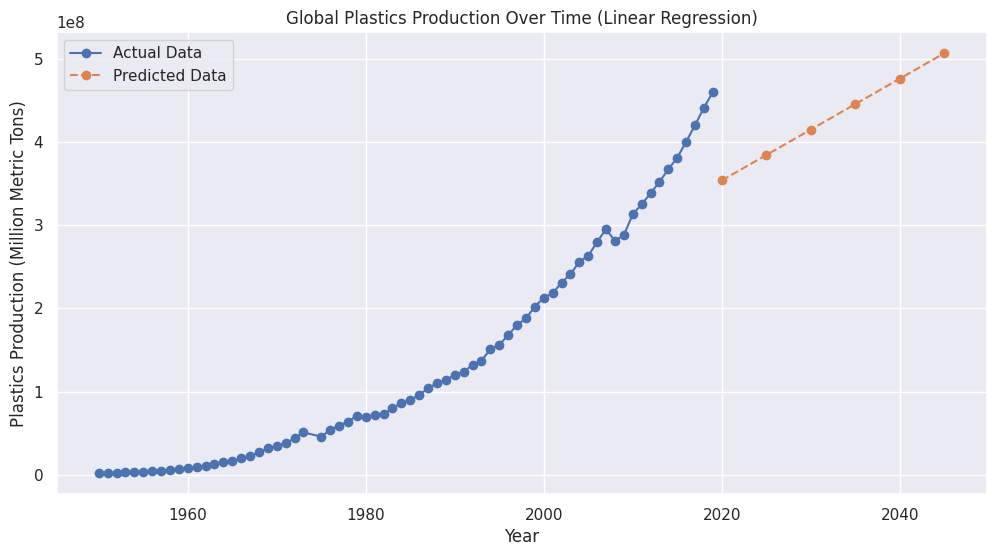

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/global-plastics-production.csv')

# Drop rows with missing 'Annual plastic production between 1950 and 2019' values
df = df.dropna(subset=['Annual plastic production between 1950 and 2019'])

# Extract the features (year) and target (plastics production)
year = df['Year'].values.reshape(-1, 1)
plastics_production = df['Annual plastic production between 1950 and 2019']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(year, plastics_production)

# Predict plastics production for future years
future_years = [[2020], [2025], [2030], [2035], [2040], [2045]]
predicted_production = model.predict(future_years)

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(year, plastics_production, marker='o', linestyle='-', label='Actual Data')
plt.plot(future_years, predicted_production, marker='o', linestyle='--', label='Predicted Data')
plt.title('Global Plastics Production Over Time (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Plastics Production (Million Metric Tons)')
plt.legend()
plt.grid(True)

# Show the chart
plt.show()

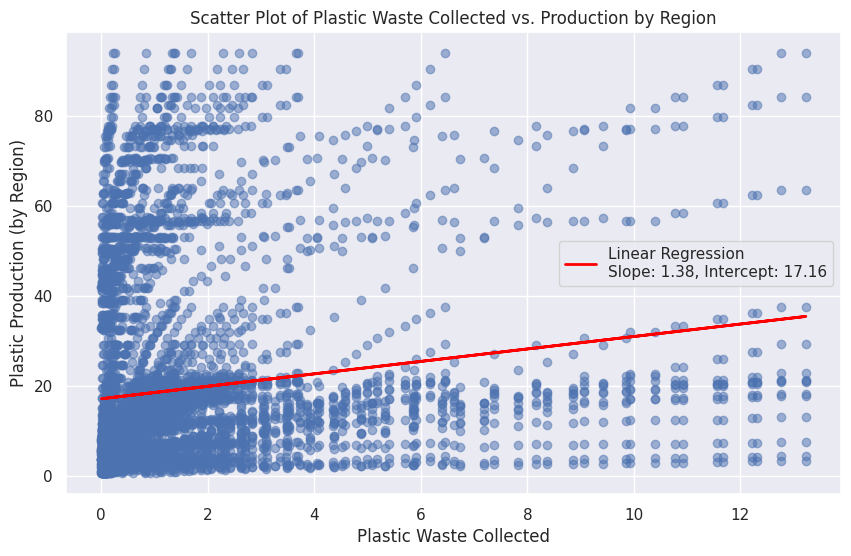

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the datasets for plastic waste collection and production regions
df_waste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pcr.csv')
df_production = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pbr.csv')  # Replace with the actual production data file

# Assuming both datasets have a common column for merging, use that column (e.g., 'TIME' for year)
common_column = 'TIME'

# Merge the datasets on the common column 'TIME'
merged_data = pd.merge(df_waste, df_production, on=common_column)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Value_x'], merged_data['Value_y'], alpha=0.5)

# Customize the plot
plt.title('Scatter Plot of Plastic Waste Collected vs. Production by Region')
plt.xlabel('Plastic Waste Collected')
plt.ylabel('Plastic Production (by Region)')
plt.grid(True)

# Fit a linear regression model
X = merged_data[['Value_x']]
y = merged_data['Value_y']
model = LinearRegression()
model.fit(X, y)

# Get the coefficients of the linear regression model
slope = model.coef_[0]
intercept = model.intercept_

# Add the regression line to the plot
plt.plot(X, model.predict(X), color='red', linewidth=2, label=f'Linear Regression\nSlope: {slope:.2f}, Intercept: {intercept:.2f}')

# Show the plot with the legend
plt.legend()
plt.show()


#Surprises

One unexpected discovery was the notably low correlation between Plastic Applications and Plastic Production, as evidenced by the shallow slope in the plot. This implies that there is only a modest increase in plastic production for each additional unit of plastic applications.

To enhance the analysis, customization of the plot is essential. It's worth noting that the dataset for plastic applications lacks regional specificity and covers a global scope. To derive more insightful results, in other words, I should ensure each dataset includes information about it's origing (i.e. plastic applications).

#Next Steps

As mentioned in the previous section, I will include additional information which includes the countries/regions for each dataset to obtain more meaningful results.

For example, the scattered plot of plastic waste collected vs production by region is much more meaningful since both dataset include similar datapoints (columns) which enhances the analysis.

The correlation for this last plot was much close to 1 which means there is a positive correlation. This could mean that when plastic production increases plastic waste collected also increases.

This makes sense, however after examining the data closely we can see even more meaningful information. For example, the plastic production of the U.S in 2019 was ~84 million tons of plastic, but it's plastic recycling of the same year was only if 6.4 million tons. The contrast between plastic production and recycling is very large.

In this milestone I have included datasets that specify regions/countries. A reader can identify by inspection which regions and which countries have the highest GDP. However, I haven't officially classified them by GDP. This will one of the next steps for the coming days since it's very relevant to my research question.

I'm also stil exploring additional variables that I wasn't aware of for this research question. For example, I didn't consider that countries also export plastic actively (i.e. consumer goods) and passively (plastic that travels on the oceans).

Lastly, I'm still exploring other machine learning techiques that can provide more useful information and visualization. For example, my basic linear regression model for global plastic production projection for 2020 - 2025 shows that the production will increase, but I believe the slope should be much step that it currently is.